### Datset: https://www.kaggle.com/datasets/mirichoi0218/insurance

Advanced Charts:

- Word Chart
- Box and Whisker Plot
- Violin Plot
- Regression Plot (Linear and Nonlinear)
- 3D Chart
- Jitter Plot
- Line Chart
- Area Chart
- Waterfall Chart
- Donut Chart
- Treemap
- Funnel Chart

Basic Charts: 

- Bar Chart
- Pie Chart
- Histogram
- Timeline Chart
- Scatter Plot
- Bubble Plot

In [14]:
import pandas as pd


In [15]:
df = pd.read_csv('data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## advanced charts

### 1. Word Chart (Region Frequency)

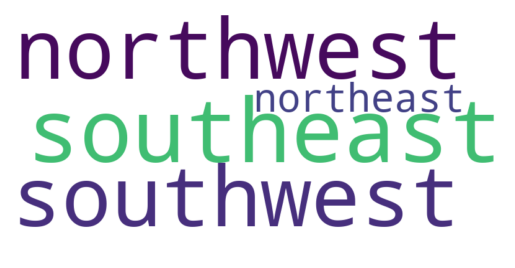

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Count occurrences in 'region' column
regions = df['region'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(regions)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
import plotly.express as px
from collections import Counter

# Count occurrences in 'region'
region_counts = Counter(df['region'])
word_data = {'Region': list(region_counts.keys()), 'Count': list(region_counts.values())}

fig = px.treemap(word_data, path=['Region'], values='Count', title='Word Chart of Region Frequency')
fig.update_traces(textinfo='label+percent entry')
fig.show()


### 2. Box and Whisker Plot (Charges by Smoker Status)

In [20]:
import plotly.express as px

fig = px.box(df, x='smoker', y='charges', color='smoker', title='Charges by Smoker Status')
fig.update_traces(marker_color='blue')
fig.show()

### 3. Violin Plot (Charges by Sex)

In [21]:
fig = px.violin(df, x='sex', y='charges', color='sex', box=True, points='all', title='Charges by Sex')
fig.show()

### 4. Regression Plot (BMI vs Charges)

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = px.scatter(df, x='bmi', y='charges', trendline='ols', color='age',
                 title='BMI vs Charges with Linear Regression')
fig.show()

### 5. 3D Chart (Age, BMI, Charges)

In [23]:
fig = px.scatter_3d(df, x='age', y='bmi', z='charges', color='smoker',
                    size='charges', opacity=0.7, title='3D Plot of Age, BMI, and Charges')
fig.show()

### 6. Jitter Plot (Age vs Charges)

In [26]:
fig = px.strip(df, x='age', y='charges', color='smoker', title='Jitter Plot: Age vs Charges')
fig.show()

### 7. Line Chart (Age vs Charges)

In [27]:
fig = px.line(df, x='age', y='charges', title='Line Chart: Age vs Charges', markers=True)
fig.show()

### 8. Area Chart (Age vs Charges by Smoker Status)

In [29]:
fig = px.area(df, x='age', y='charges', color='smoker', title='Area Chart: Age vs Charges by Smoker Status')
fig.show()

### 9. Waterfall Chart (Charges by Region)

In [30]:
import plotly.graph_objects as go

region_charges = df.groupby('region')['charges'].sum().sort_values(ascending=False)
fig = go.Figure(go.Waterfall(
    x=region_charges.index,
    y=region_charges.values,
    text=[f'${val:.2f}' for val in region_charges.values],
    measure=['relative']*len(region_charges),
    textposition="outside",
))

fig.update_layout(title='Waterfall Chart: Charges by Region')
fig.show()

### 10. Donut Chart (Smoker Distribution)

In [31]:
fig = px.pie(df, names='smoker', hole=0.5, title='Donut Chart of Smokers')
fig.update_traces(textinfo='percent+label')
fig.show()

### 11. Treemap (Charges by Region)

In [33]:
fig = px.treemap(df, path=['region'], values='charges', color='charges',
                 title='Treemap of Charges by Region')
fig.show()

### 12. Funnel Chart (Charges by Region)

In [34]:
fig = px.funnel(df, x='region', y='charges', title='Funnel Chart: Charges by Region')
fig.show()

## basic charts

### 13. Bar Chart (Charges by Region)

In [35]:
fig = px.bar(df, x='region', y='charges', color='region', title='Bar Chart: Charges by Region')
fig.show()

### 14. Pie Chart (Smoker Distribution)

In [36]:
fig = px.pie(df, names='smoker', title='Pie Chart of Smokers')
fig.update_traces(textinfo='percent+label')
fig.show()

### 15. Histogram (Distribution of Charges)

In [37]:
fig = px.histogram(df, x='charges', nbins=30, title='Distribution of Charges', color_discrete_sequence=['teal'])
fig.show()

### 16. Timeline Chart (Age vs Charges)

In [42]:
import plotly.express as px

# Creating the timeline chart using 'age' as a proxy for time
fig = px.line(df, x='age', y='charges', title='Timeline Chart: Charges by Age', markers=True)

# Adding interactivity with hover information
fig.update_traces(mode='lines+markers')

# Customize the layout for a clean look
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Charges",
    hovermode="x unified"
)

fig.show()

### 17. Scatter Plot (BMI vs Charges)

In [38]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', title='Scatter Plot: BMI vs Charges',
                 size='charges', hover_data=['age'])
fig.show()

### 18. Bubble Plot (Age, BMI, Charges)

In [41]:
fig = px.scatter(df, x='age', y='charges', size='bmi', color='smoker', title='Bubble Plot: Age, BMI, Charges',
                 hover_data=['region'])
fig.show()